# Network traffic Prediction

1. Document and structure

2. Data preparation

3. Add more checkpoint

4. use TSNE detect outlier
   - analyze why anomaly point happen

5. Optimize model and hyperparameter
   - show accuracy
   - analyze training data

6. How to save model

7. Use tensorflow serving/tensorflow deployment

8. use Tensorboard to analyze training process

9. Demo preparation

In [4]:
import numpy as np
import matplotlib as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [29]:
# The code was removed by DSX for sharing.

## load data from swift object storage 

In [30]:
# The code was removed by DSX for sharing.

In [6]:
data_files=['env5_brain_192.155.247.207_20170401_20170601.csv',
            'env5_brain_169.55.245.30_20170401_20170601.csv',
            'env5_brain_169.54.213.198_20170401_20170601.csv',
            'env5_brain_10.143.131.55_20170401_20170601.csv',
            'env5_brain_10.143.123.125_20170401_20170601.csv',
            'env5_brain_10.107.77.247_20170401_20170601.csv']
data_files1=['env5_brain_10.107.77.247_20170401_20170601.csv']

17317
(17542, 3)
17446
(17544, 3)
17472
(17544, 3)
17446
(17544, 3)
17472
(17544, 3)
17317
(17542, 3)


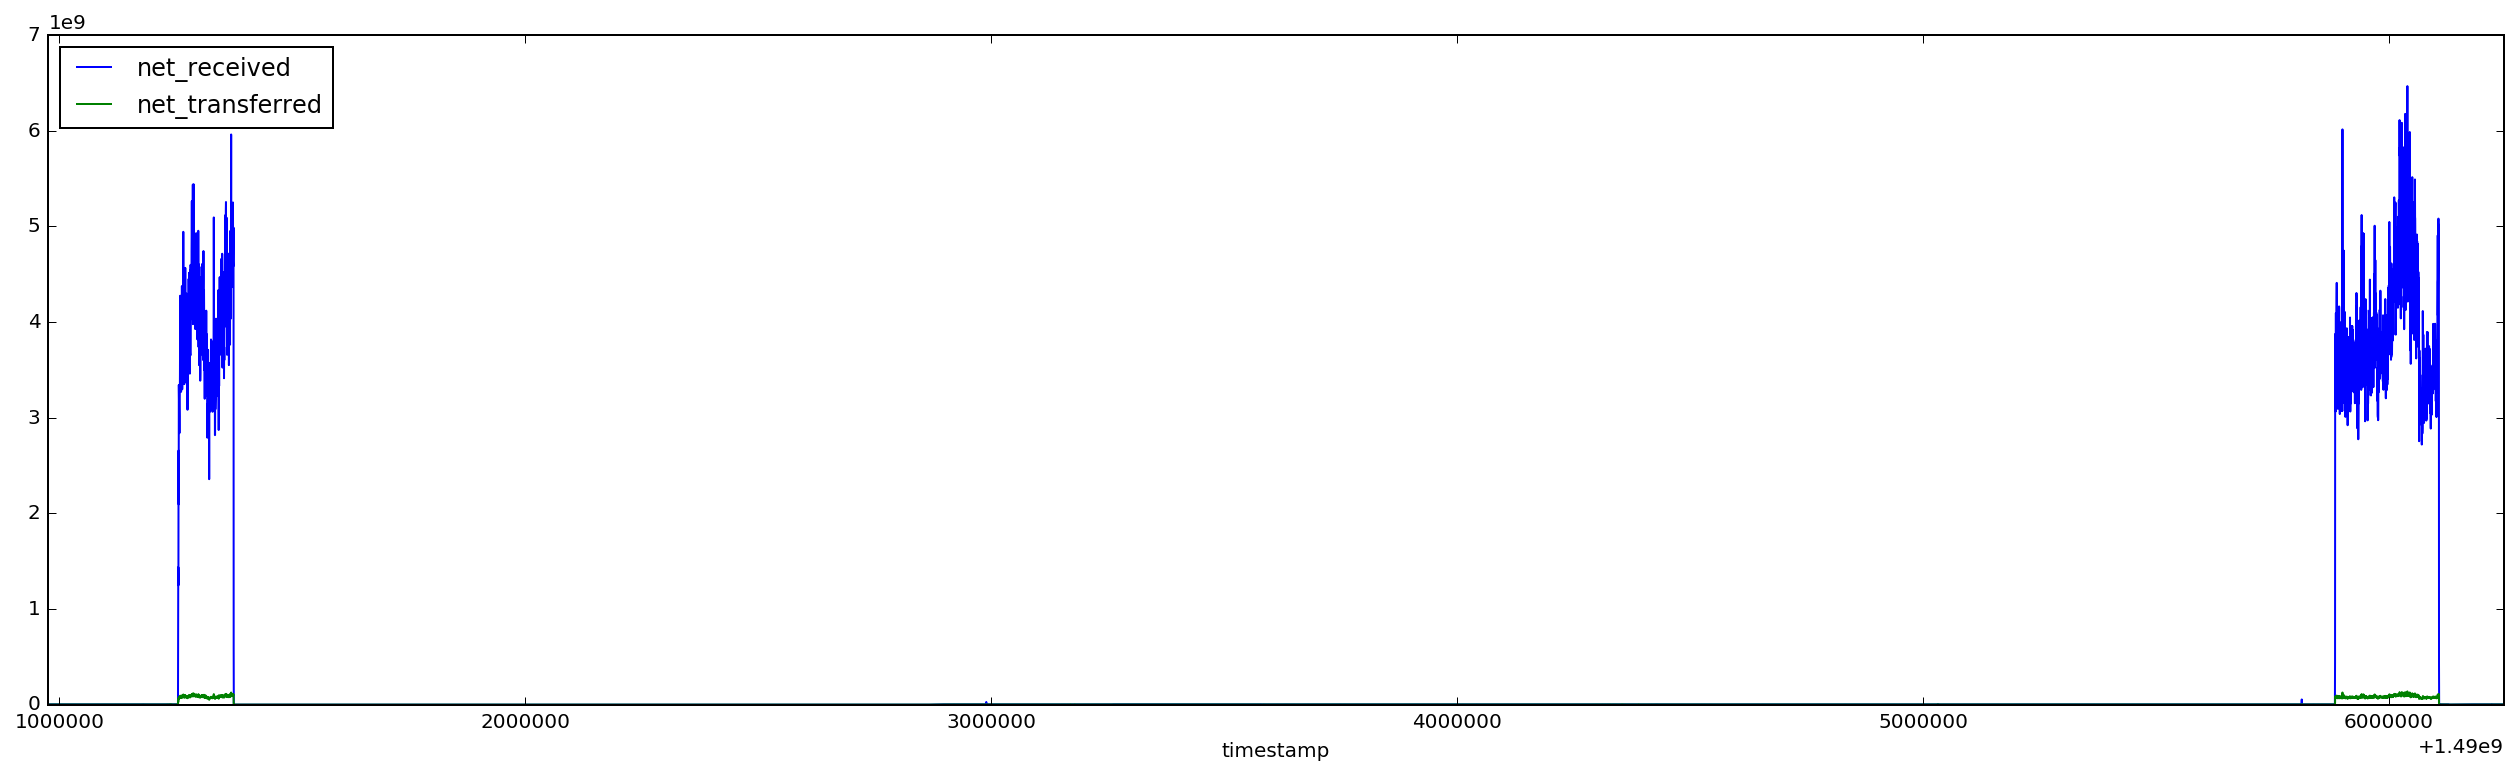

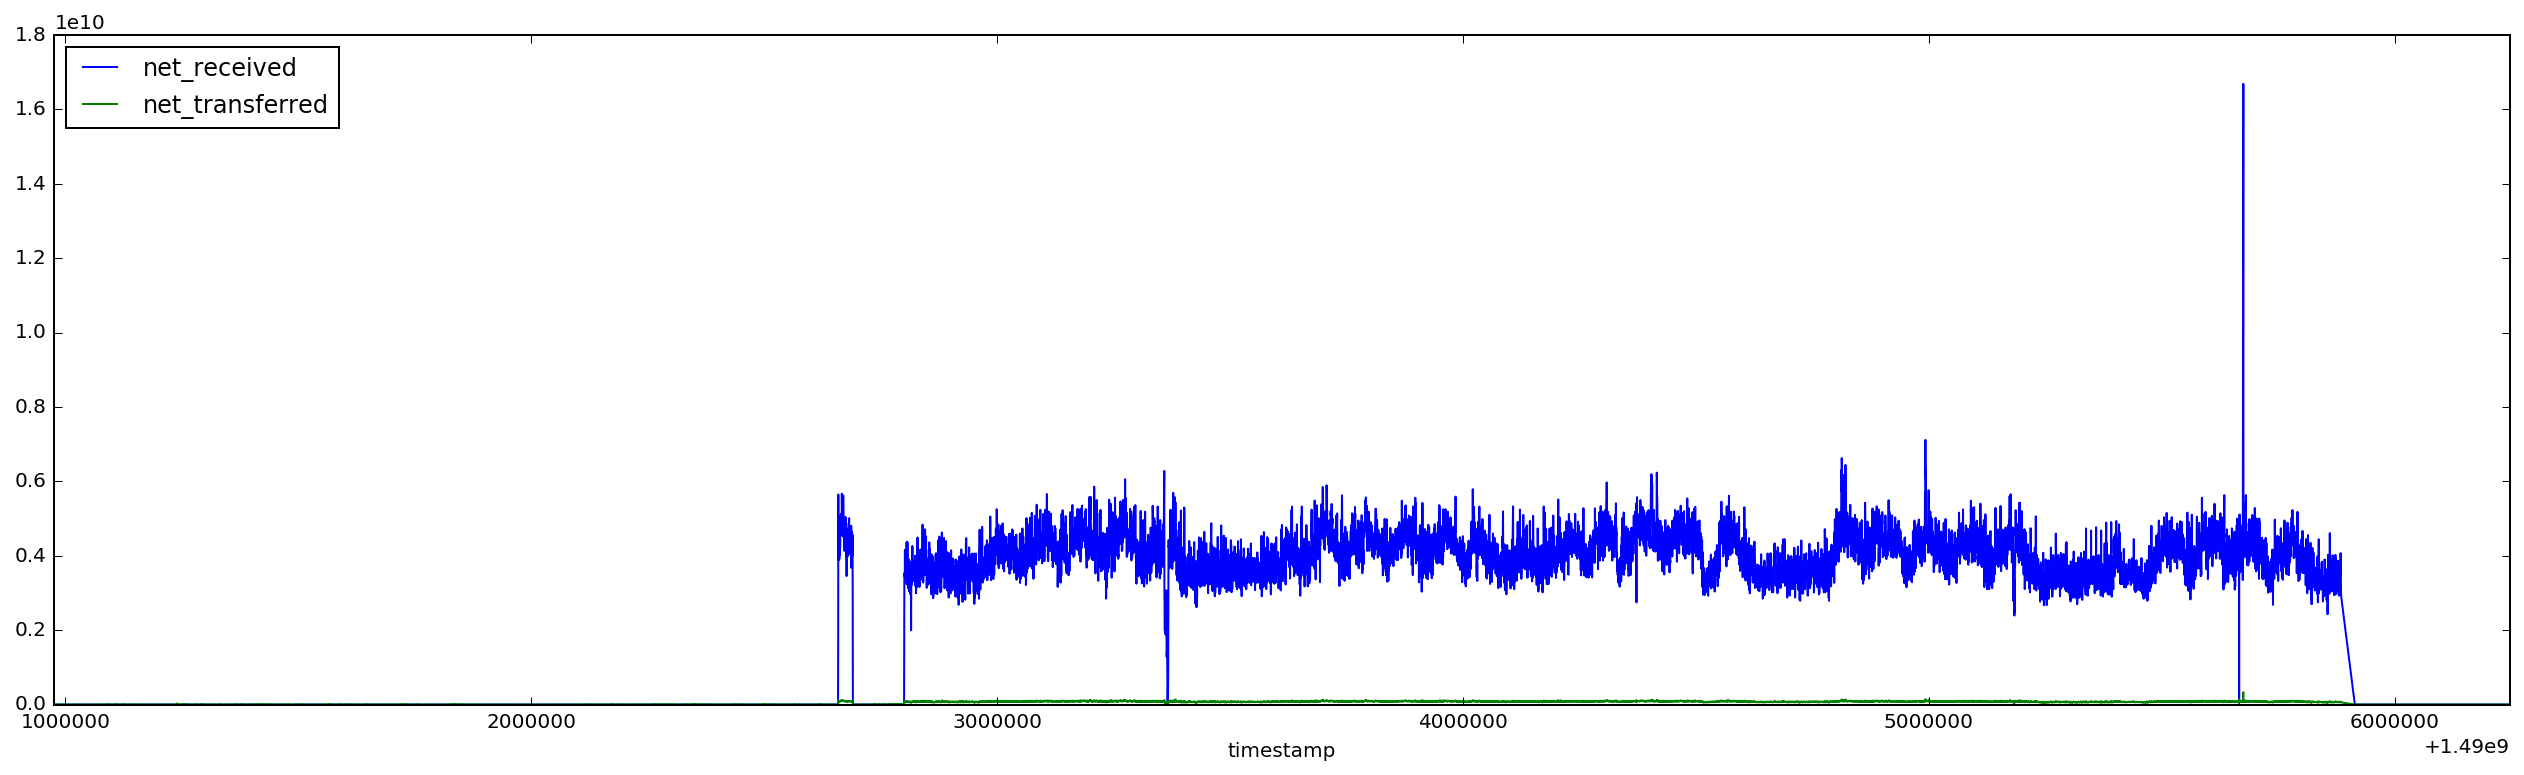

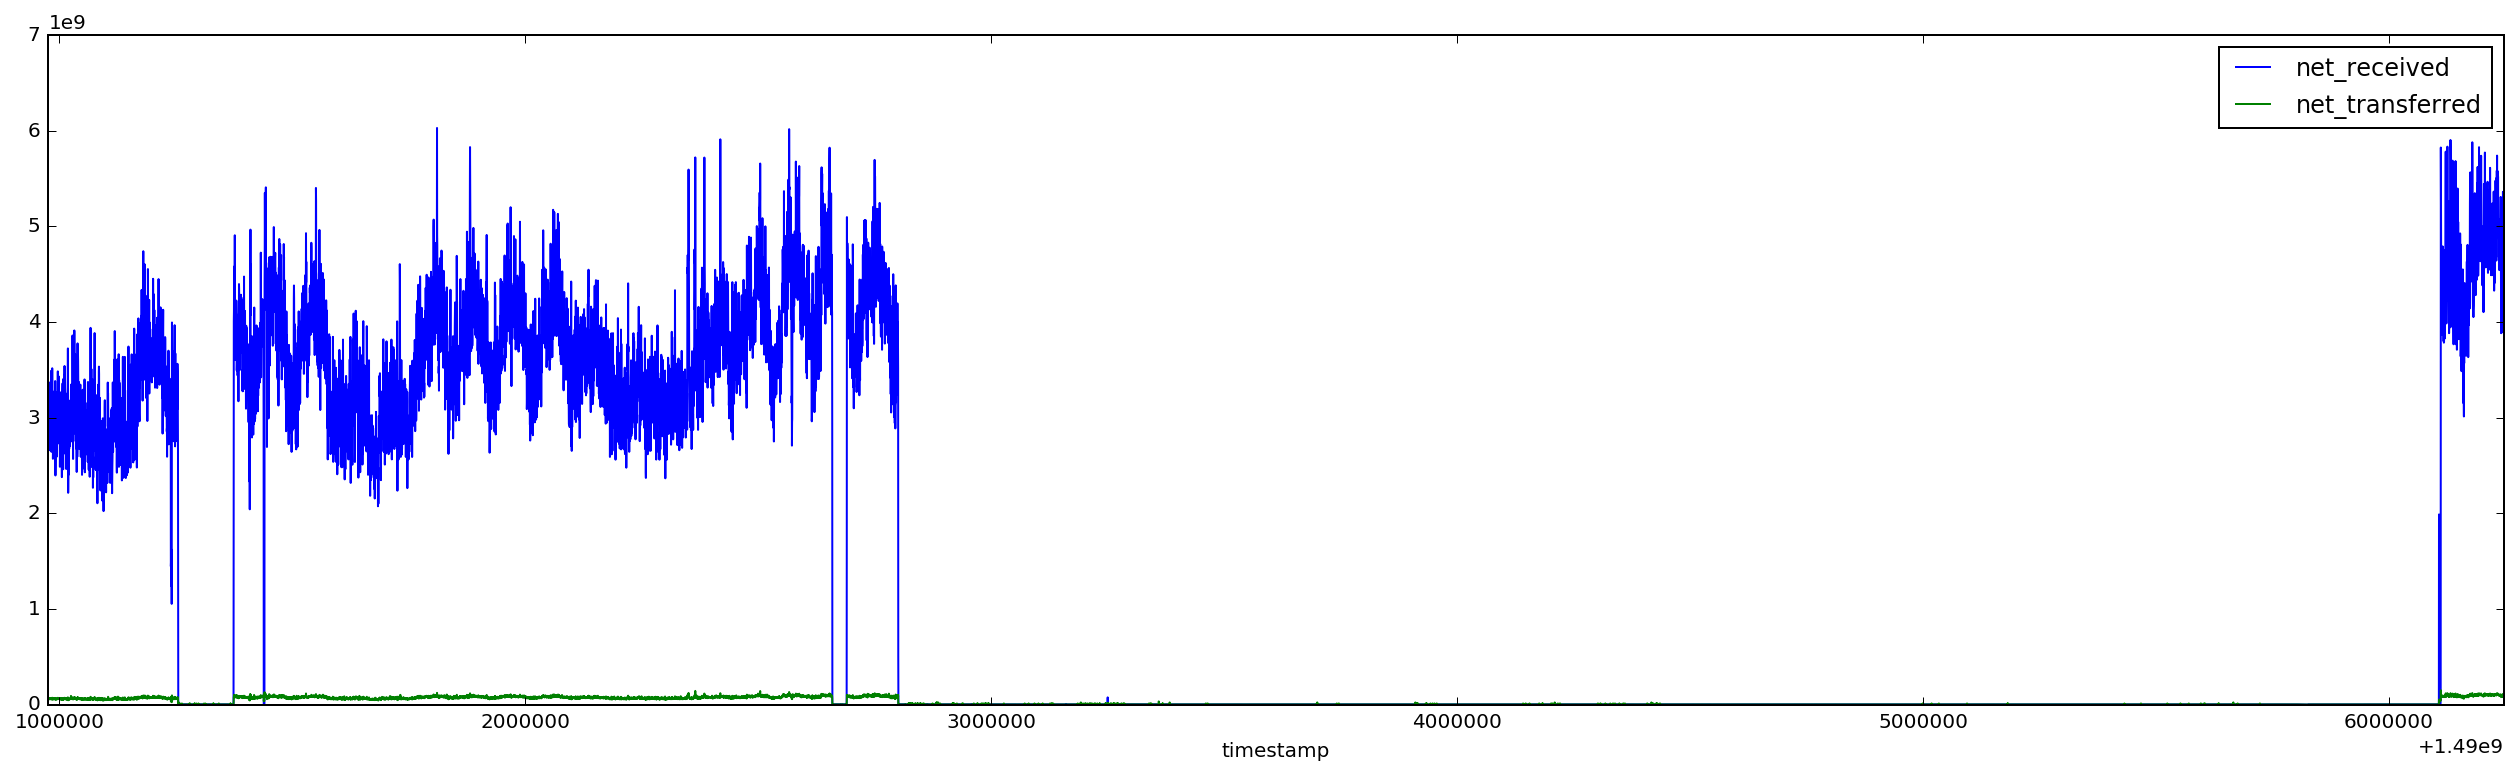

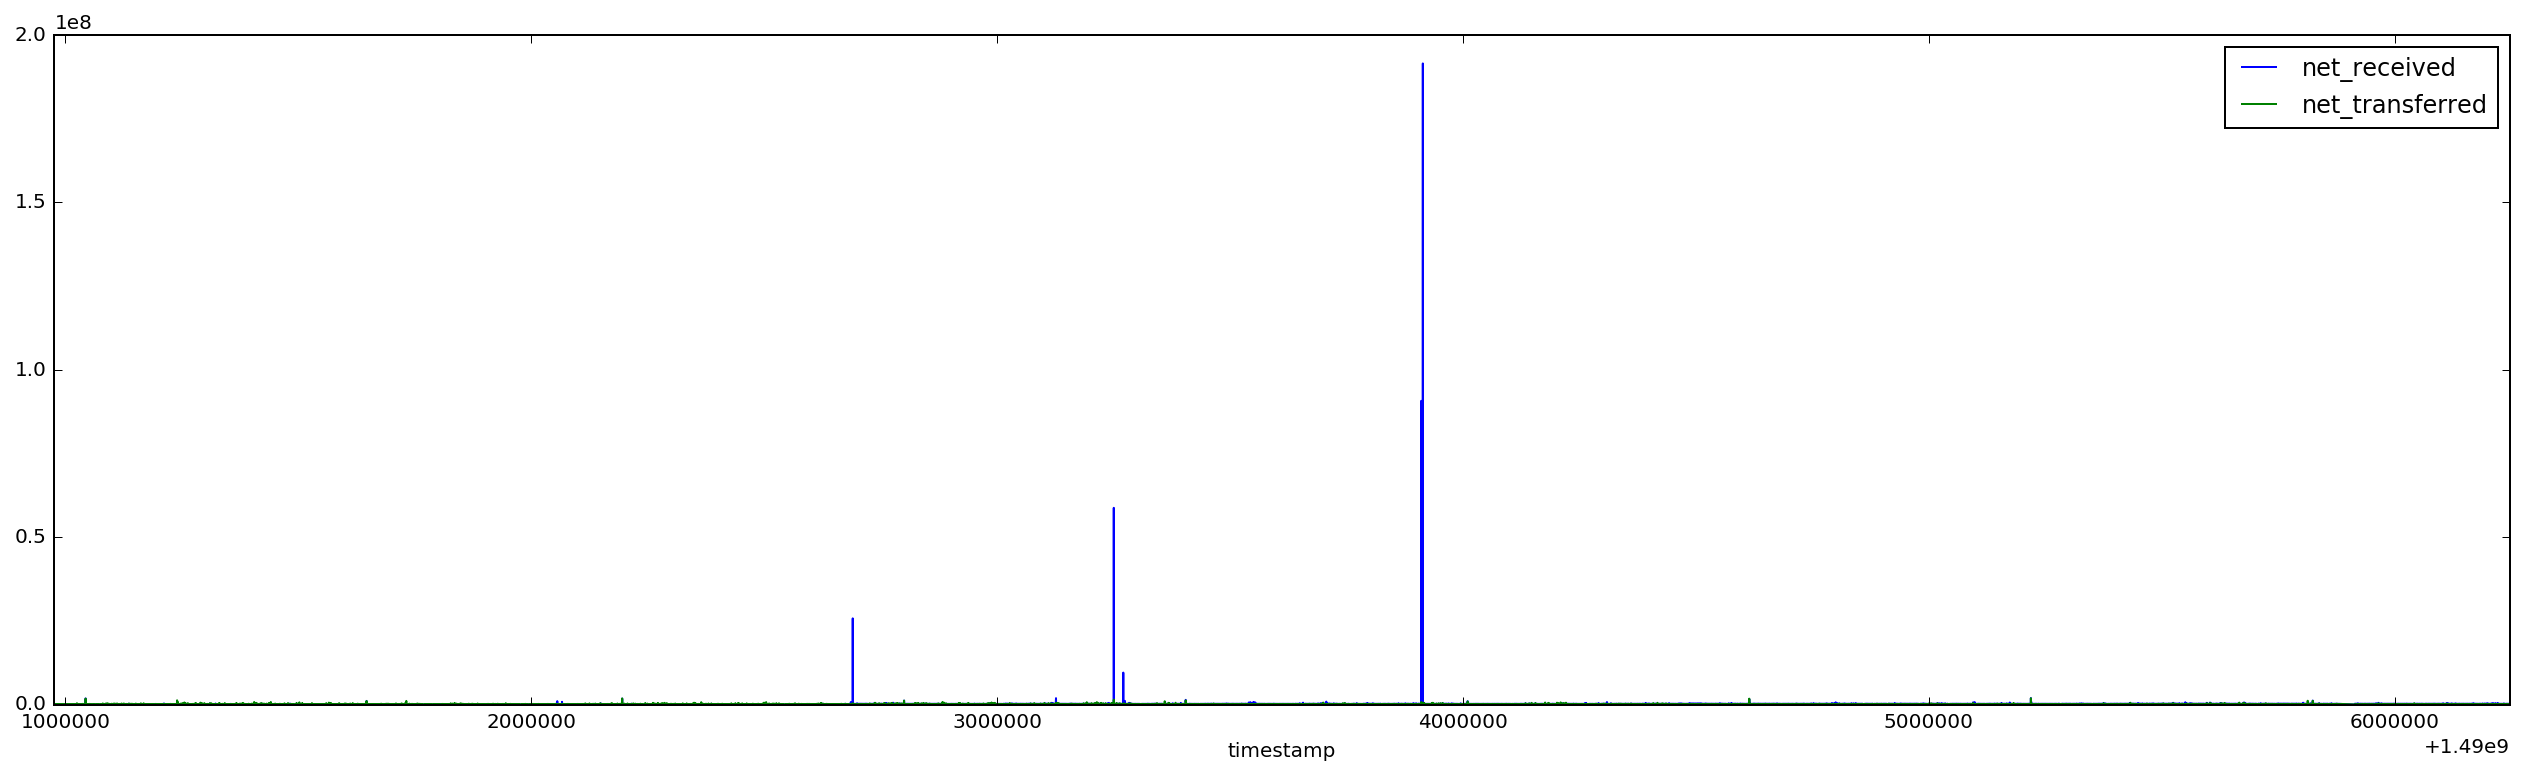

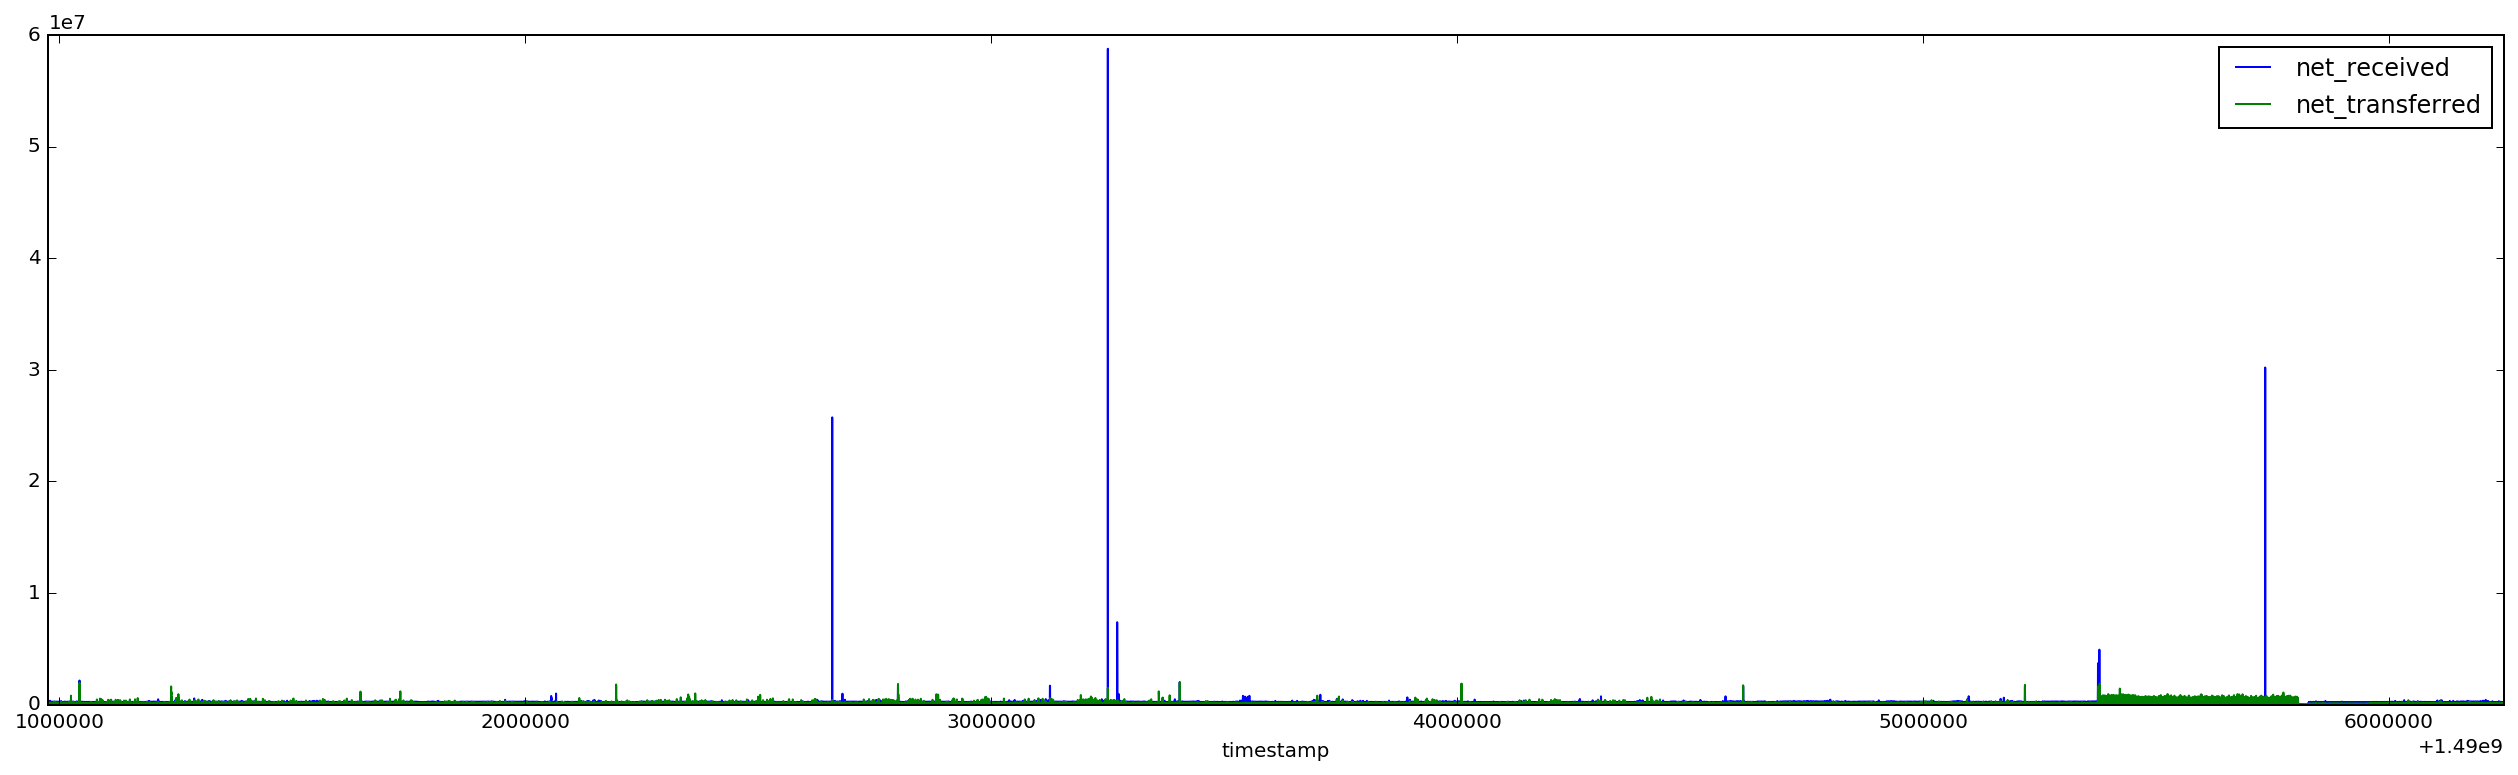

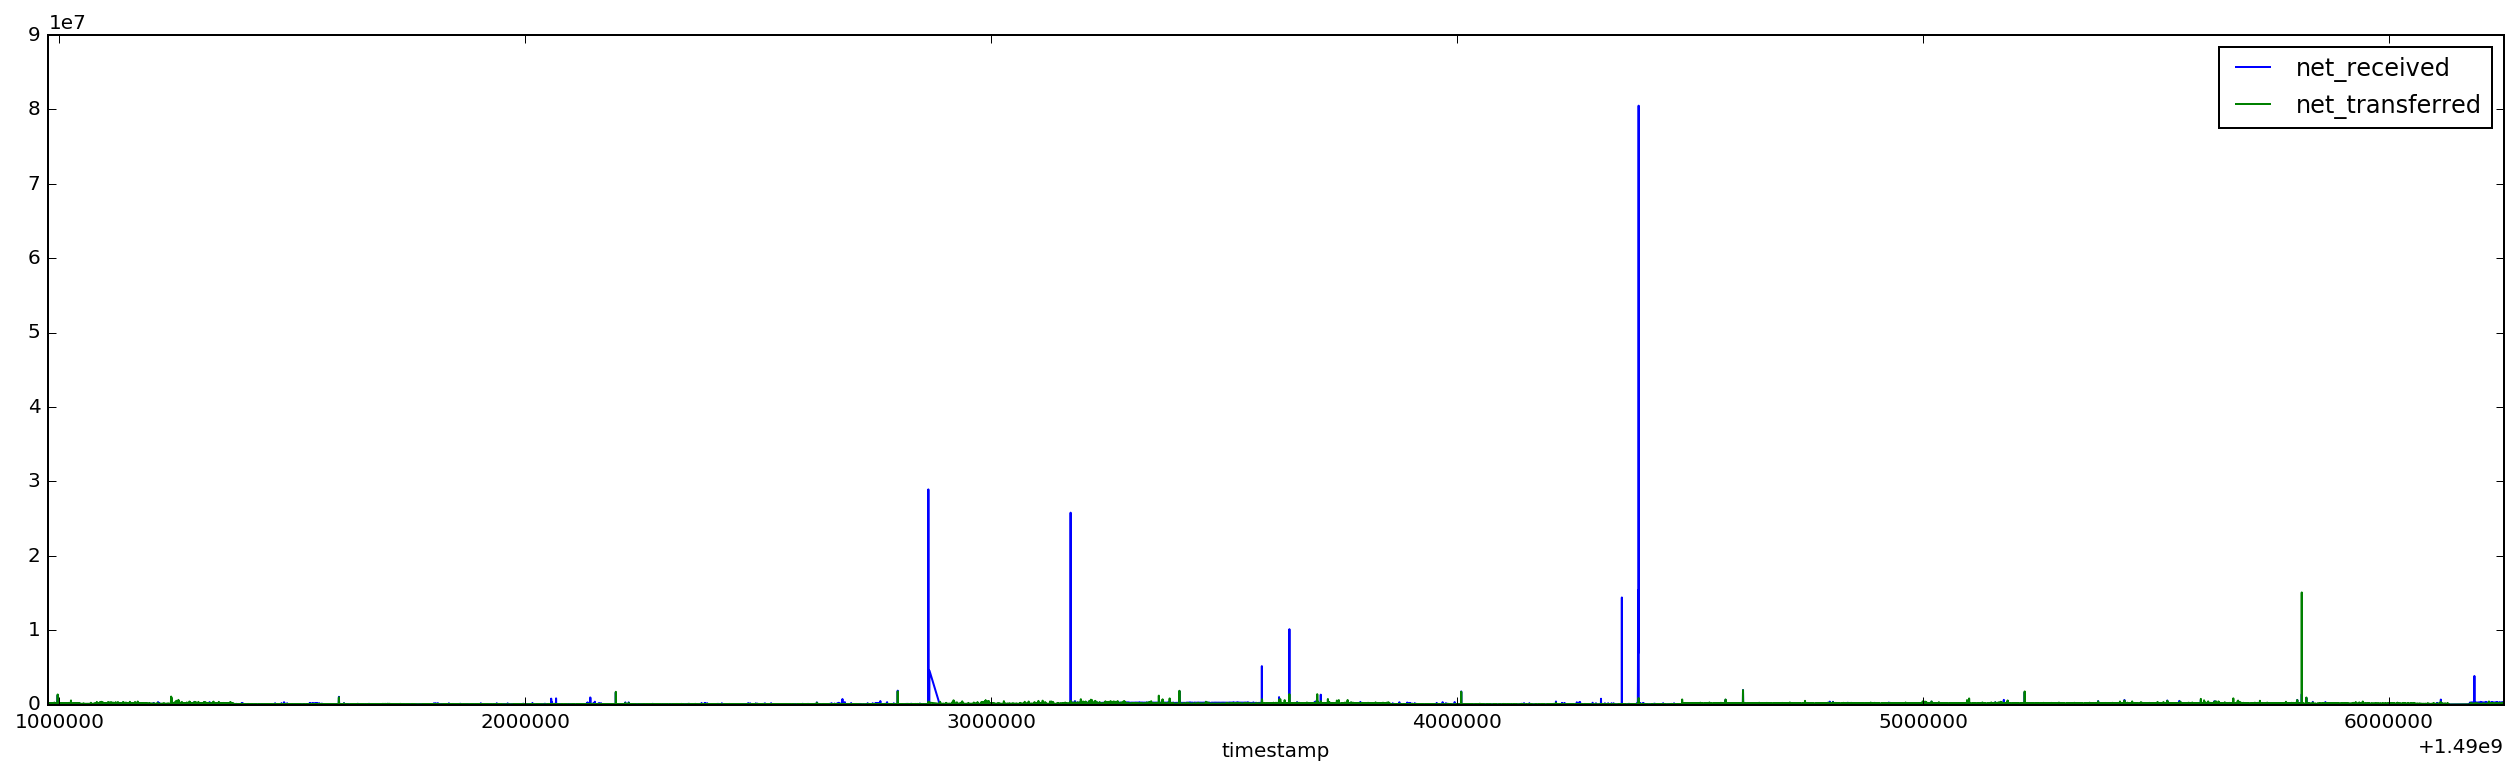

In [7]:
for data_file in data_files:
    src_data = pd.read_csv(load_files('DefaultProjectjiamaocnibmcom', data_file))
    #src_data.head()
    src_data.plot(x='timestamp',figsize=(22,6))
    input=np.empty(shape=(0,3))
    first_row= True
    previous_timestamp=0
    #print(src_data.iloc(src_data.shape[0]))
    i=0
    for index, row in src_data.iterrows():
        current_timestamp=row['timestamp']
        if first_row:
            first_row= False
            previous_timestamp=current_timestamp
        else:
            #print('-----',current_timestamp)
            interval=current_timestamp-previous_timestamp
            if interval<300:
                print('incorrect interval',current_timestamp,previous_timestamp,interval)
            elif interval>=300 and interval<400:
                input=np.append(input,[[current_timestamp,row['net_received'],row['net_transferred']]],axis=0)
                #print('normal interval',current_timestamp,previous_timestamp,interval)
            elif interval>=400:
                while interval>=400:
                    #print('there is gap and generate new data',current_timestamp,previous_timestamp,interval)
                    #print(row['net_received'],row['net_transferred'])
                    previous_timestamp=previous_timestamp+300

                    input=np.append(input,[[previous_timestamp,0,0]],axis=0)
                    interval=current_timestamp-previous_timestamp
            previous_timestamp=current_timestamp
        i=i+1
    print(i)
    print(input.shape)
    #print(input)
        

In [9]:
dataframes=[]
for data_file in data_files:
    dataframes.append(pd.read_csv(load_files('DefaultProjectjiamaocnibmcom', data_file)))
timestamps=set()
for data in dataframes:
    for t in (data['timestamp']):
        timestamps.add(t)
    #print(type(data['timestamp']))
    #timestamps.add(data['timestamp'])
ts=sorted(timestamps)


In [10]:
s_input=np.empty(shape=(0,2))
for t in ts:
    sum_received=0
    sum_transferred=0
    for data in dataframes:
        i=data[data['timestamp']==t]
        cur_received=i.get('net_received',0)
        cur_transfer=i.get('net_transferred',0)
        for ind in cur_transfer.index:
            sum_transferred+=cur_transfer[ind]
        for ind in cur_received.index:
            sum_received+=cur_received[ind]
    s_input=np.append(s_input,[[sum_received,sum_transferred]],axis=0)
print(s_input)


[[  3.23829906e+09   6.92302500e+07]
 [  2.98978194e+09   6.49355350e+07]
 [  2.72662850e+09   5.98400170e+07]
 ..., 
 [  3.89577671e+09   8.49461070e+07]
 [  4.67576506e+09   9.98608080e+07]
 [  4.35472312e+09   9.27667460e+07]]


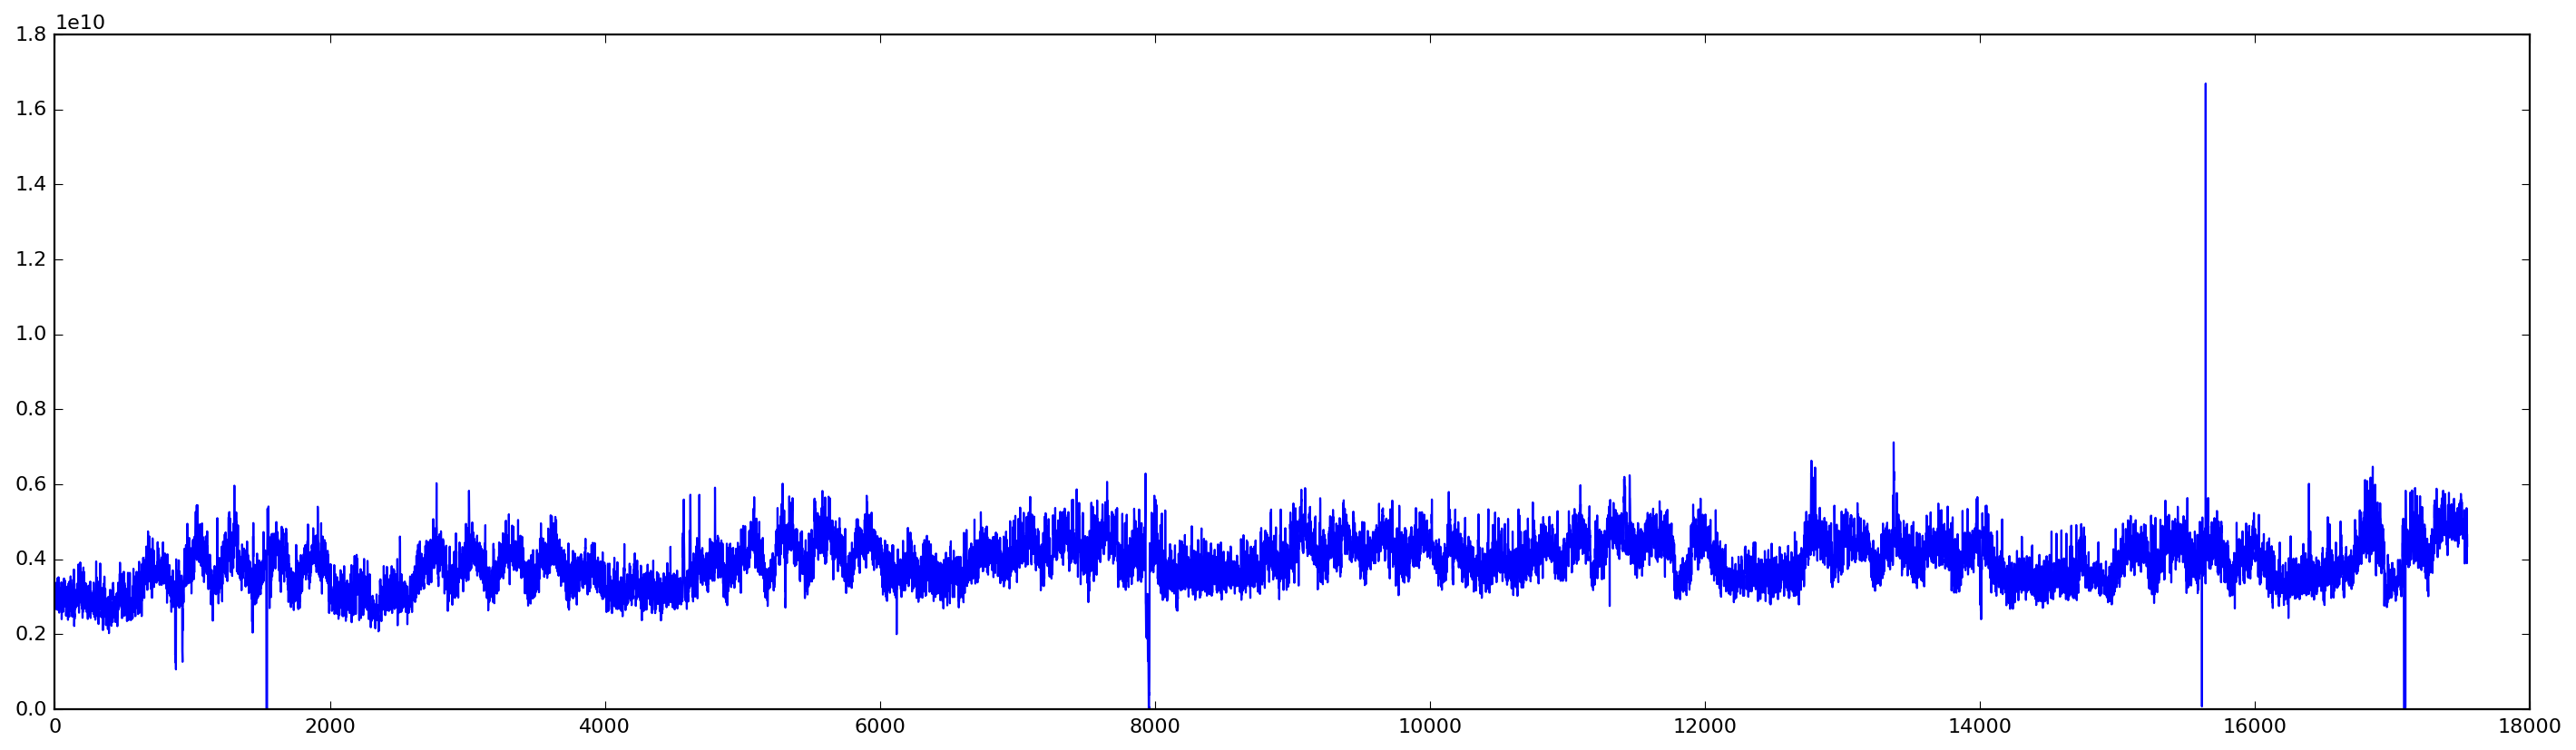

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,6), dpi=80)
plt.plot(s_input[:,0:1])

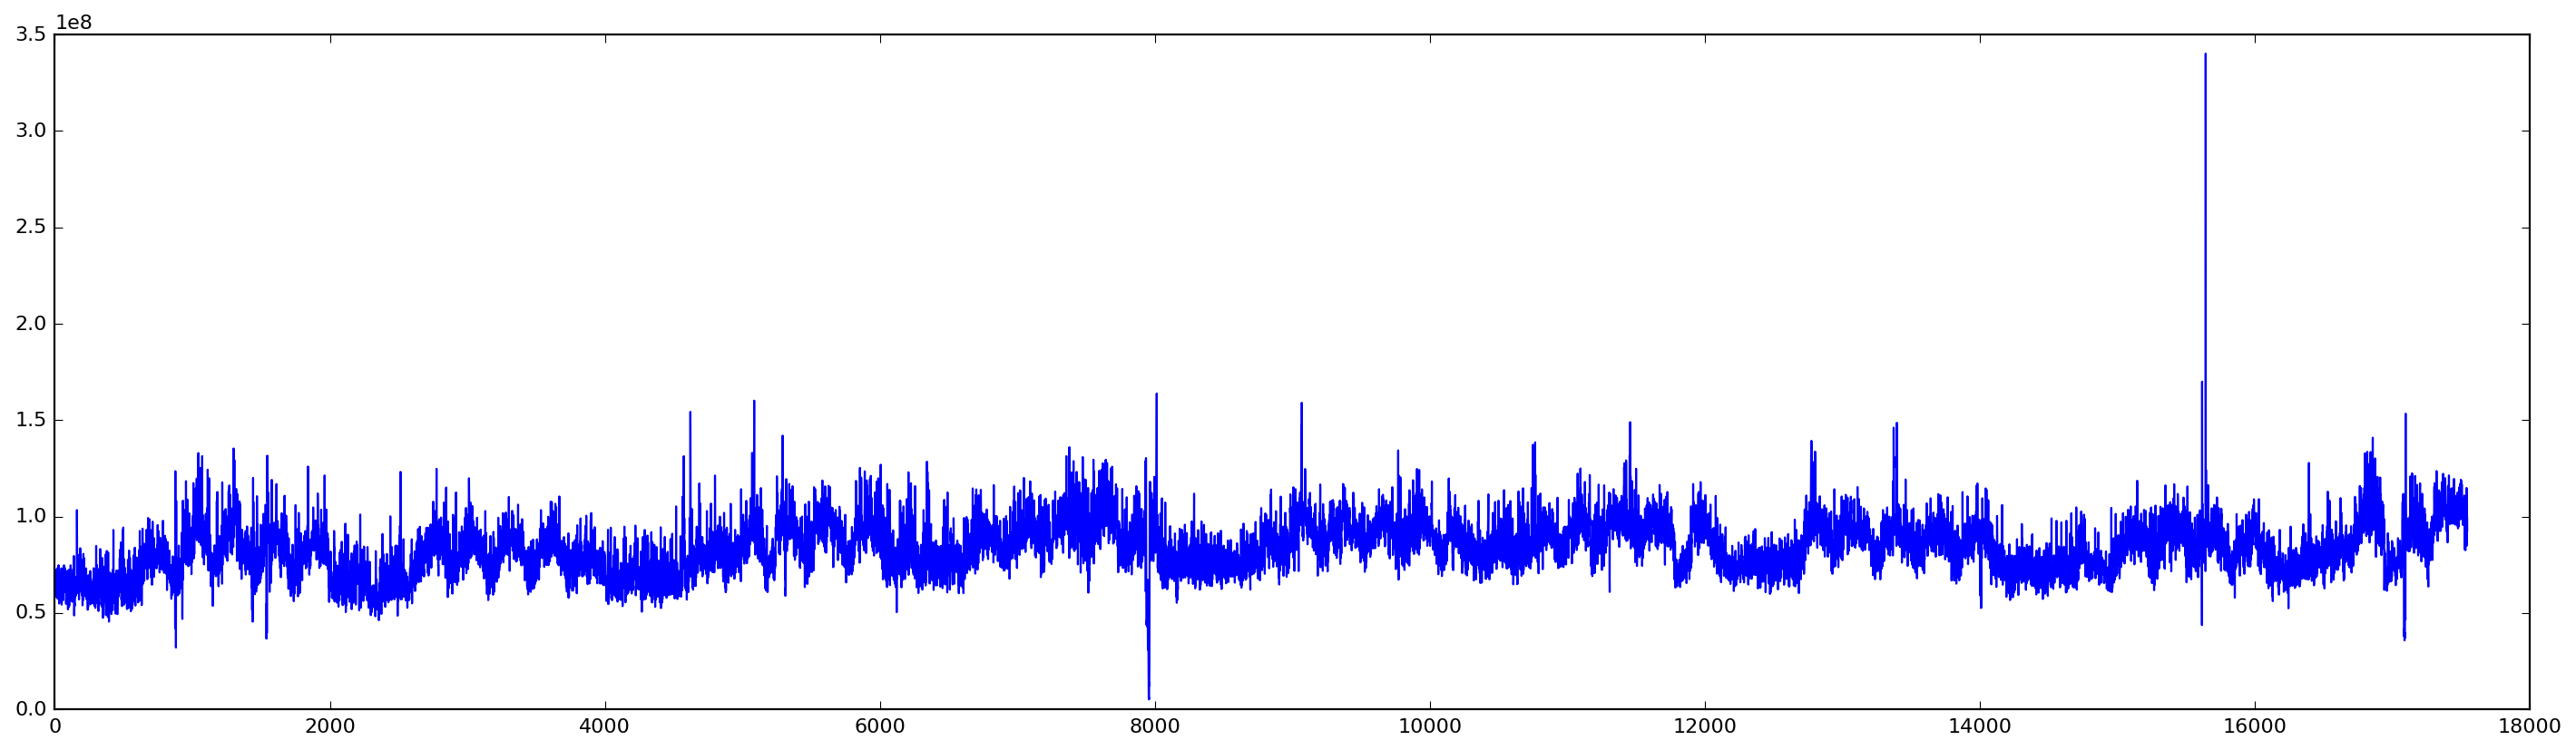

In [12]:
plt.figure(figsize=(22,6), dpi=80)

plt.plot(s_input[:,1:2])

## Compute Hourly Network traffic

In [13]:
hourly_input=np.empty(shape=(0,2))
size=s_input.shape[0]
for i in range(0,size,12):
    slice=s_input[i:i+12,:]
    hourly_rev=0
    hourly_transfer=0
    for s in slice:
        hourly_rev+=s[0]
        hourly_transfer=s[1]
    hourly_input=np.append(hourly_input,[[hourly_rev,hourly_transfer]],axis=0)

        

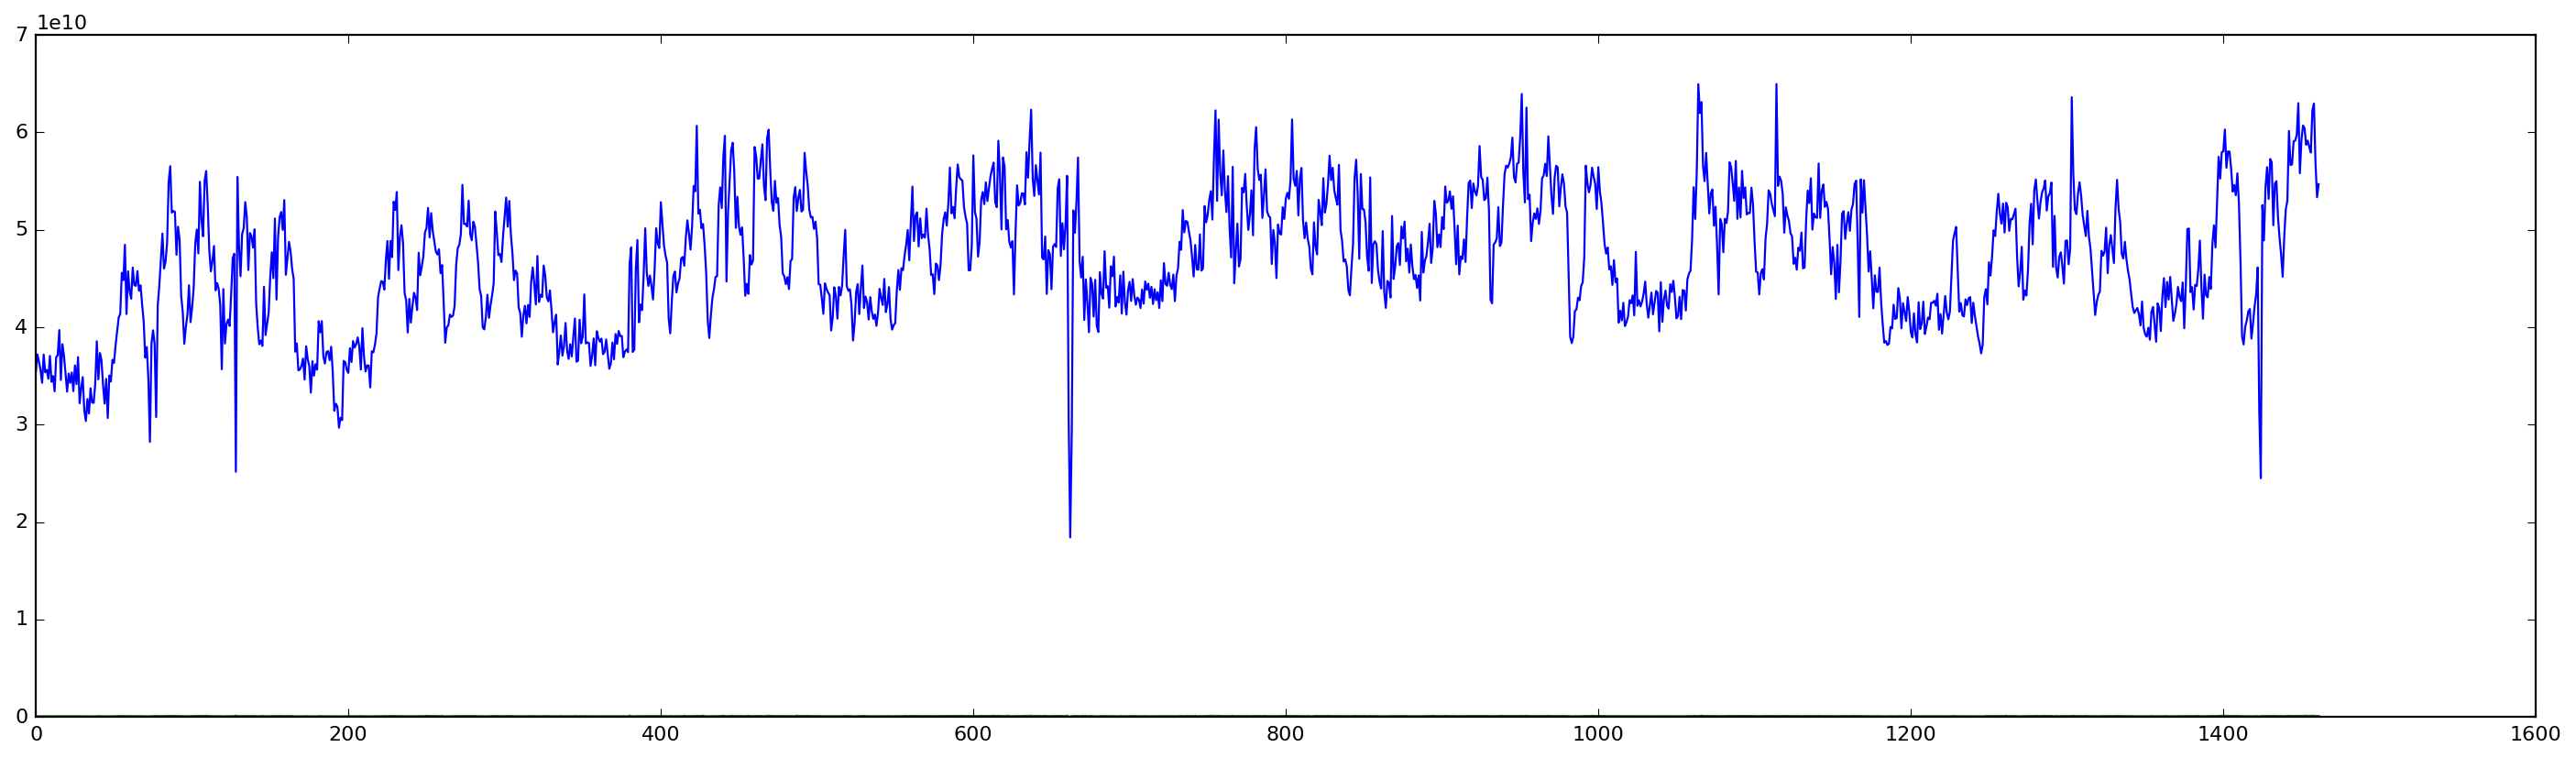

In [14]:
plt.figure(figsize=(22,6), dpi=80)

plt.plot(hourly_input)

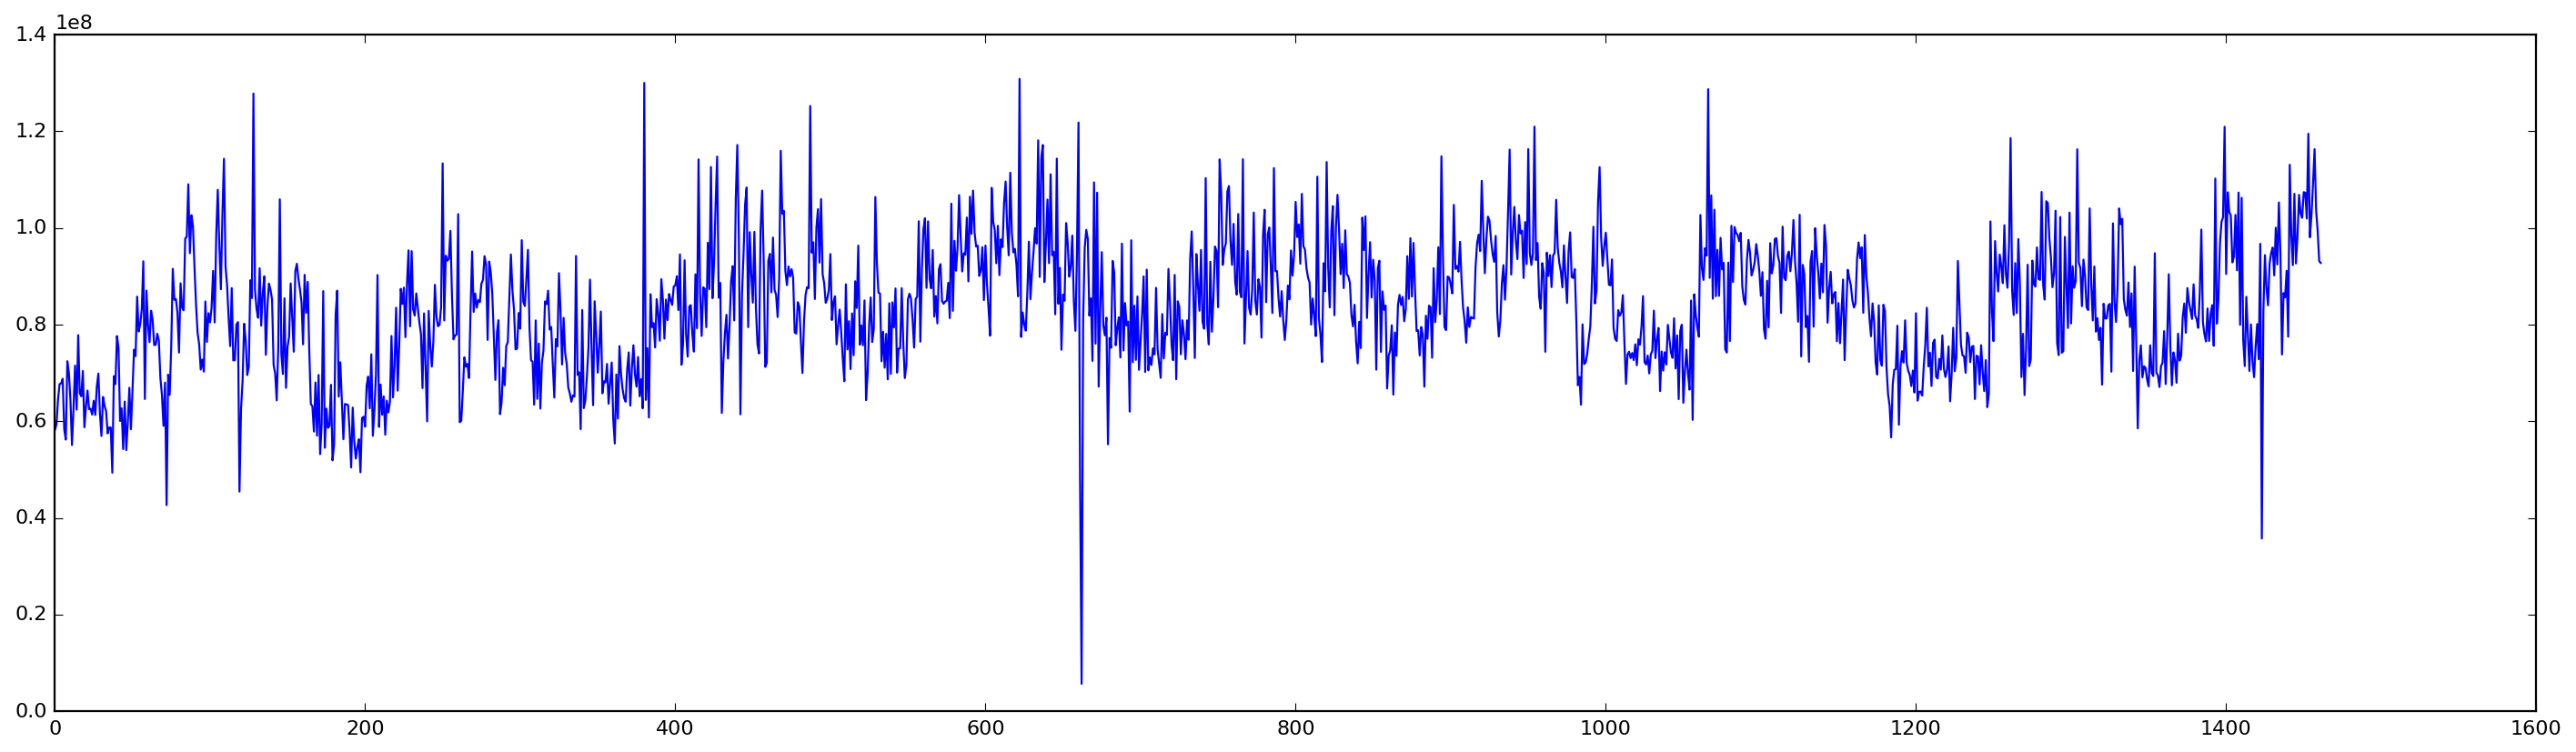

In [15]:
plt.figure(figsize=(22,6), dpi=80)

plt.plot(hourly_input[:,1:2])

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(hourly_input[:,0:1])


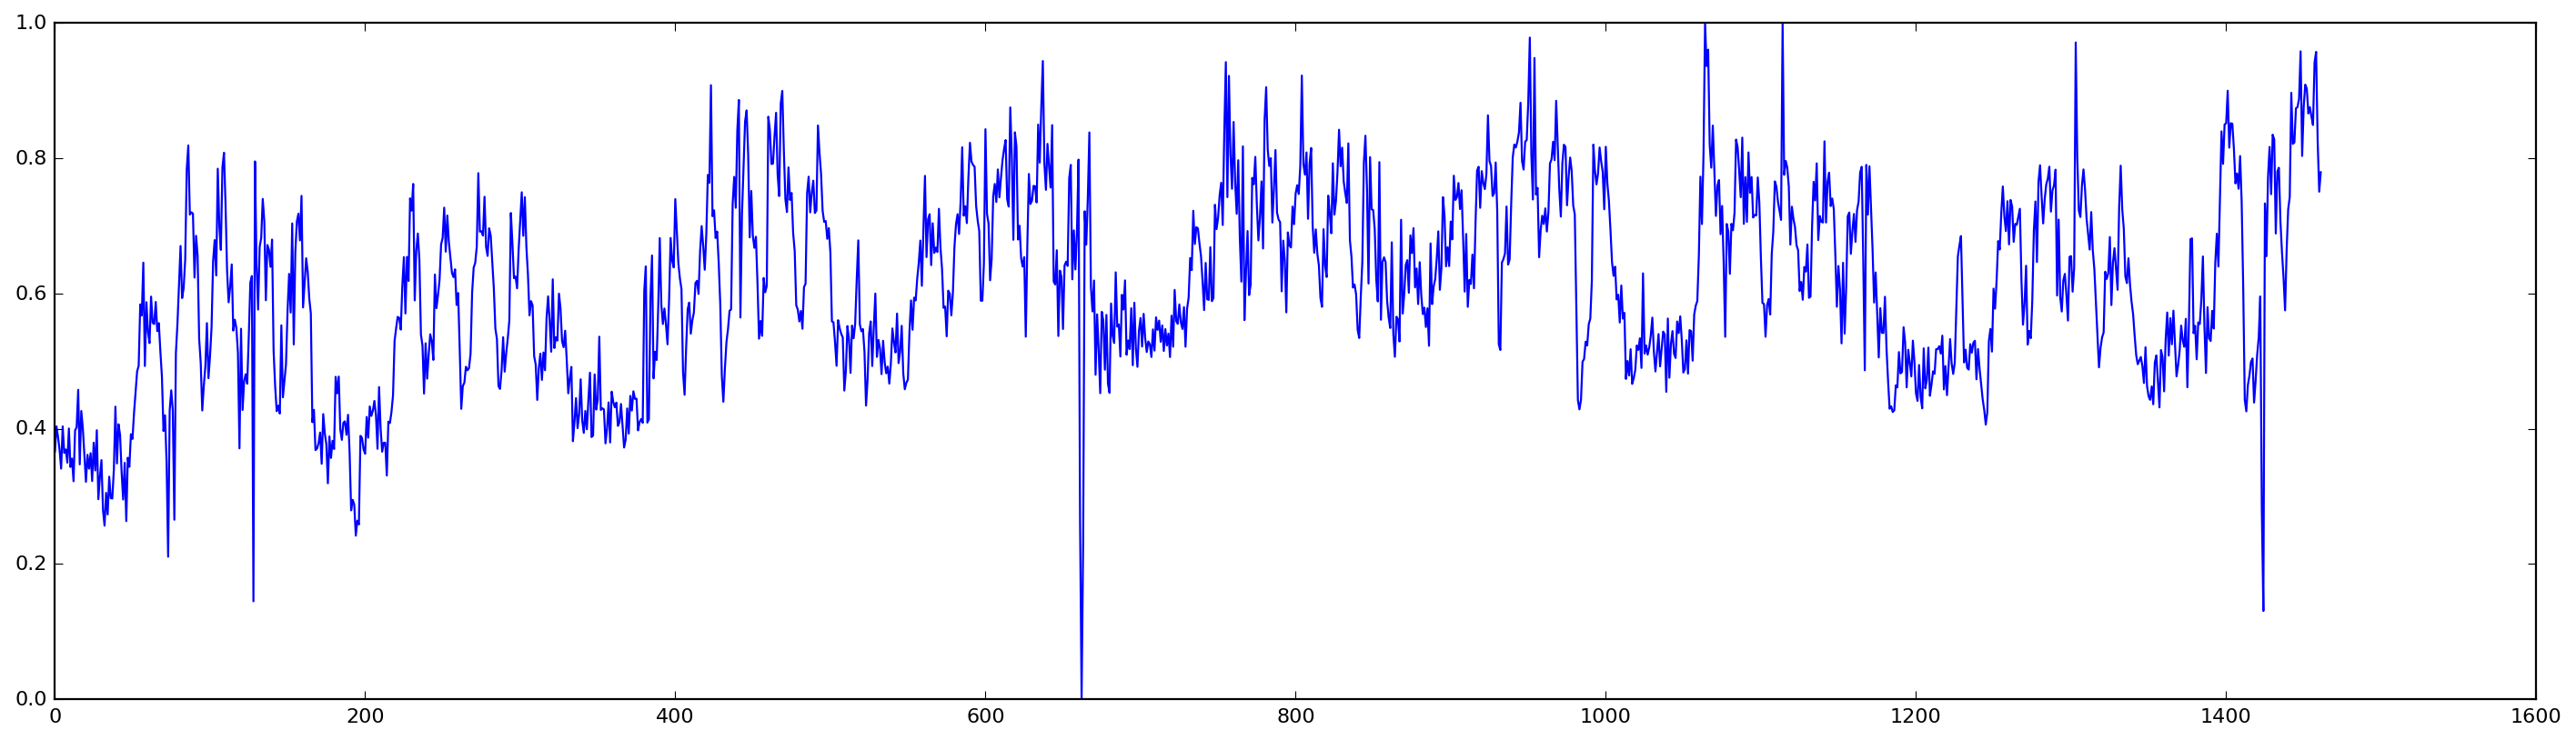

In [17]:
plt.figure(figsize=(22,6), dpi=80)
plt.plot(dataset)

Epoch 1/100
5s - loss: 0.0357
Epoch 2/100
3s - loss: 0.0077
Epoch 3/100
3s - loss: 0.0065
Epoch 4/100
3s - loss: 0.0059
Epoch 5/100
3s - loss: 0.0058
Epoch 6/100
3s - loss: 0.0058
Epoch 7/100
3s - loss: 0.0058
Epoch 8/100
3s - loss: 0.0058
Epoch 9/100
3s - loss: 0.0057
Epoch 10/100
3s - loss: 0.0058
Epoch 11/100
3s - loss: 0.0058
Epoch 12/100
3s - loss: 0.0057
Epoch 13/100
3s - loss: 0.0057
Epoch 14/100
3s - loss: 0.0057
Epoch 15/100
3s - loss: 0.0058
Epoch 16/100
3s - loss: 0.0057
Epoch 17/100
3s - loss: 0.0057
Epoch 18/100
3s - loss: 0.0058
Epoch 19/100
3s - loss: 0.0058
Epoch 20/100
3s - loss: 0.0058
Epoch 21/100
3s - loss: 0.0057
Epoch 22/100
3s - loss: 0.0058
Epoch 23/100
3s - loss: 0.0058
Epoch 24/100
3s - loss: 0.0057
Epoch 25/100
3s - loss: 0.0057
Epoch 26/100
3s - loss: 0.0057
Epoch 27/100
3s - loss: 0.0057
Epoch 28/100
3s - loss: 0.0058
Epoch 29/100
3s - loss: 0.0057
Epoch 30/100
3s - loss: 0.0058
Epoch 31/100
3s - loss: 0.0057
Epoch 32/100
3s - loss: 0.0057
Epoch 33/100
3s -

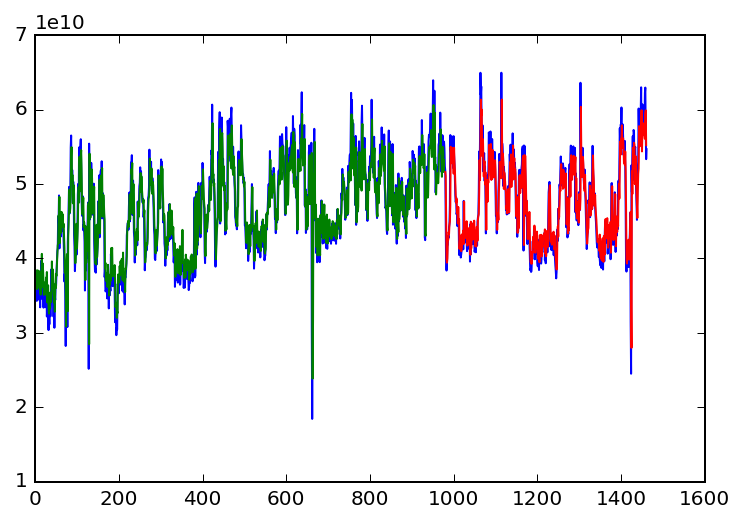

In [20]:


import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

numpy.random.seed(7)
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
epochs=100

# load the dataset

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions


In [ ]:

import tensorflow as tf
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

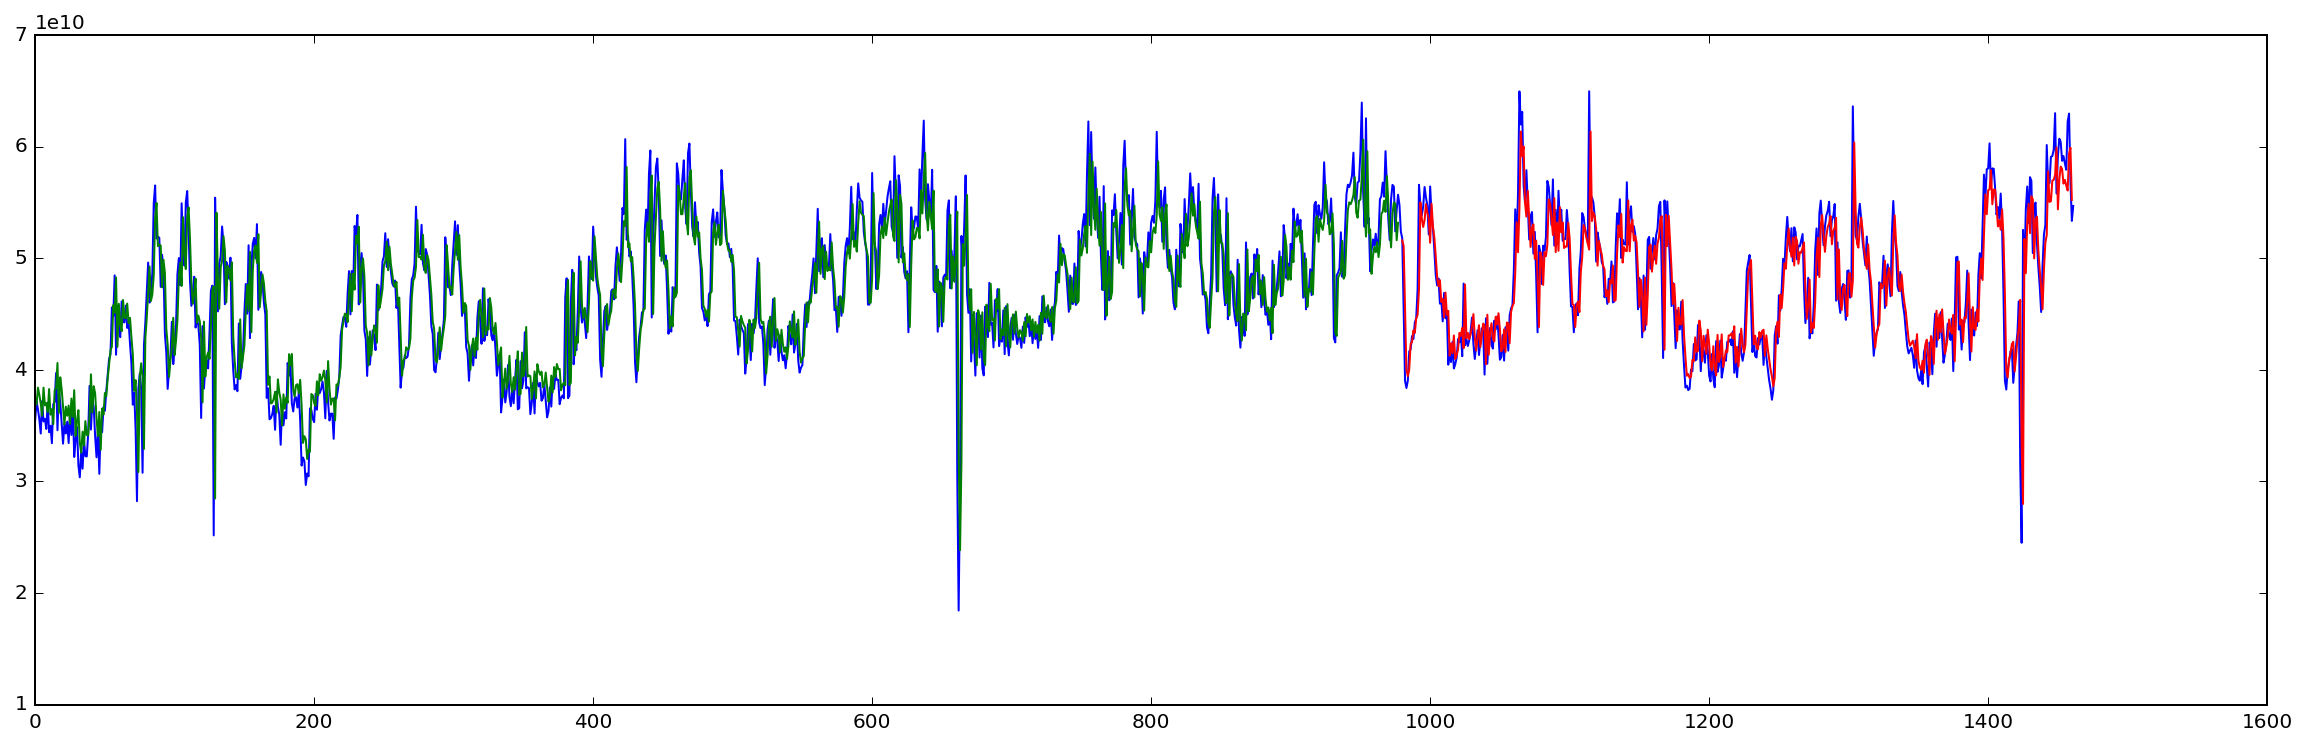

In [28]:
plt.figure(figsize=(20,6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
import keras
keras.__version__
